# Team 5-Econ149 Project                                             

## Project Overview:

The focus of this project is to establish a relationship between GDP and CPI to create a regression and to test the validity of the real wealth effect which states that when consumer price levels decrease, the real GDP increases. This is because when price levels decrease it takes less money to buy goods and services and people feel weathier so they end up buying more. We hypothesize that the wealth effect is true; as CPI decreases, the real GDP increases. 

## Project Structure:
    
The project will begin by providing a data report. This data report will explain where the data comes from and how to access it.

The second part of this project will provide summary statistics on real GDP and CPI and give graphs to help visualize the trends.

The third part of the project will state a hypothesis on the real wealth effect. Then a linear regression will be performed to test the hypothesis and the results will be stated. 

Lastly there will be a discussion on what was found and how it compares to our original hypothesis.

## Data Report:
    
The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides monthly data on the real GDP and CPI from 1947 to 2020. The data can be accessed at https://fred.stlouisfed.org.

## Key Variables:

We are trying to prove the real wealth effect using the following two key variables, real GDP and CPI. 

According to Investopedia, the definition of the wealth effect is the following: "The wealth effect is a behavioral economic theory suggesting that people spend more as the value of their assets rise. The idea is that consumers feel more financially secure and confident about their wealth when their homes or investment portfolios increase in value. They are made to feel richer, even if their income and fixed costs are the same as before."

FRED defines GDP as the following: "Gross domestic product (GDP) is the value of the goods and services produced by the nation's economy less the value of the goods and services used up in production. GDP is also equal to the sum of personal consumption expenditures, gross private domestic investment, net exports of goods and services, and government consumption expenditures and gross investment. Real values are inflation-adjusted estimates—that is, estimates that exclude the effects of price changes."

FRED defines CPI as the following: "The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays."

In [66]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

## Access Data 

In [130]:
#Access Data For GDP
url = 'https://raw.githubusercontent.com/alex91008/Econ-149-project/master/A191RL1Q225SBEA.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()



,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


In [131]:
data.columns=['Date', 'Real GDP']
data.head()

,Date,Real GDP
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


In [132]:
#Summary Statistic for Real GDP
data.describe()


,Real GDP
count,294.000000
mean,3.163946
std,4.681230
min,-31.400000
25%,1.225000
50%,3.000000
75%,5.100000
max,33.100000


In [133]:
#Converting Month to Year 
data['Date'] = pd.DatetimeIndex(data['Date']).year
data.columns = ['Year', 'Real GDP']
data.head()

,Year,Real GDP
0,1947,-1.0
1,1947,-0.8
2,1947,6.4
3,1948,6.2
4,1948,6.8


In [134]:
data = data.groupby(['Year']).mean()
data.head()

,Real GDP
Year,
1947,1.533333
1948,3.925000
1949,-1.475000
1950,13.450000
1951,5.500000


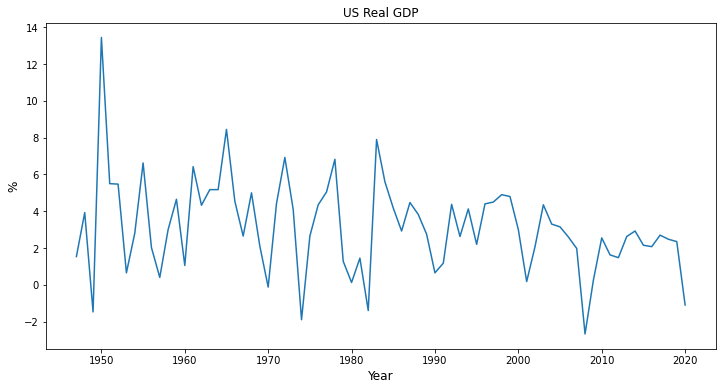

In [135]:
#Graphing GDP
ax = data.plot(title='US Real GDP', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [136]:
#Access Data for CPI 
url_cpi = 'https://raw.githubusercontent.com/alex91008/Econ-149-project/master/Consumer%20Price%20Index%20for%20All%20Urban%20Consumers.csv'
data_cpi = pd.read_csv(url_cpi, parse_dates=True)
data_cpi.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [137]:
data_cpi.columns=['Date', 'CPI']
data_cpi.head()

,Date,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [138]:
data_cpi.describe()

,CPI
count,886.000000
mean,111.778622
std,78.855799
min,21.480000
25%,31.557500
50%,101.250000
75%,179.450000
max,260.325000


In [139]:
#Converting Month to Year 
data_cpi['Date'] = pd.DatetimeIndex(data_cpi['Date']).year
data_cpi.columns = ['Year', 'CPI']
data_cpi.head()

,Year,CPI
0,1947,21.48
1,1947,21.62
2,1947,22.00
3,1947,22.00
4,1947,21.95


In [140]:
data_cpi = data_cpi.groupby(['Year']).mean()
data_cpi.head()

,CPI
Year,
1947,22.331667
1948,24.045000
1949,23.809167
1950,24.062500
1951,25.973333


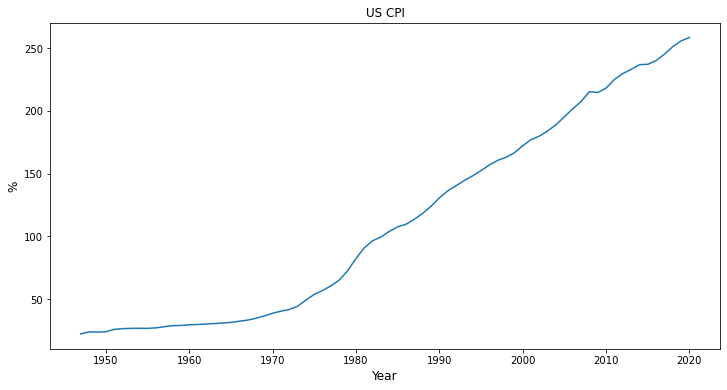

In [141]:
#Graphing CPI 
ax = data_cpi.plot(title='US CPI', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [142]:
data_cpi['DCPI'] = data_cpi['CPI'].diff()
data_cpi.head()

,CPI,DCPI
Year,,
1947,22.331667,NaN
1948,24.045000,1.713333
1949,23.809167,-0.235833
1950,24.062500,0.253333
1951,25.973333,1.910833


In [143]:
# data_cpi['Inflation'] = data_cpi['DCPI']/ data_cpi['CPI']
data_cpi['Inflation'] = [data_cpi.iloc[x, 1]/data_cpi.iloc[x-1, 0] for x in range(data_cpi.shape[0])]
data_cpi.head()

,CPI,DCPI,Inflation
Year,,,
1947,22.331667,NaN,NaN
1948,24.045000,1.713333,0.076722
1949,23.809167,-0.235833,-0.009808
1950,24.062500,0.253333,0.010640
1951,25.973333,1.910833,0.079411


In [144]:
data_cpi.describe()

,CPI,DCPI,Inflation
count,74.000000,73.000000,73.000000
mean,112.108770,3.233326,0.034476
std,79.558140,2.381576,0.028143
min,22.331667,-0.689583,-0.009808
25%,31.763958,0.922500,0.015787
50%,101.758333,3.511500,0.028166
75%,179.160417,4.663083,0.042266
max,258.364500,9.800000,0.135017


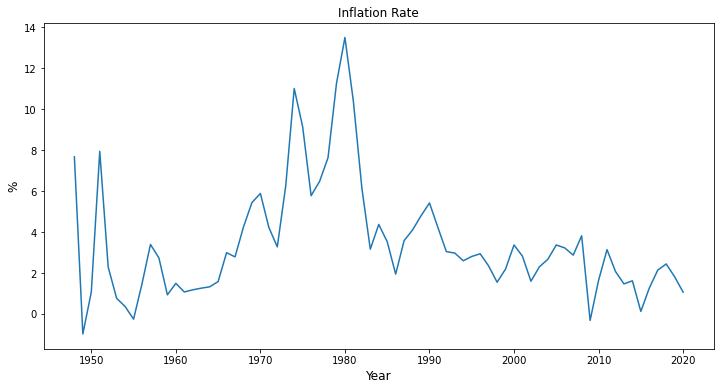

In [146]:
#Graphing inflation
data_cpi= data_cpi[['Inflation']]
data_cpi['Inflation'] = data_cpi['Inflation'] * 100
ax = data_cpi.plot(title='Inflation Rate', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

## Merge Data 

In [147]:
#Merge Data 
data_merge=pd.merge(data, data_cpi, how='inner', on='Year', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.head()

,Real GDP,Inflation
Year,,
1947,1.533333,NaN
1948,3.925000,7.672214
1949,-1.475000,-0.980800
1950,13.450000,1.064016
1951,5.500000,7.941126


In [153]:
data_merge['Inflation']

Year
1947         NaN
1948    7.672214
1949   -0.980800
1950    1.064016
1951    7.941126
          ...   
2016    1.260504
2017    2.138499
2018    2.439642
2019    1.811751
2020    1.061507
Name: Inflation, Length: 74, dtype: float64

In [158]:
data_merge = data_merge.drop(labels=data_merge.index[0])

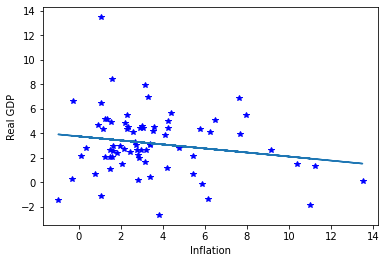

In [160]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['Inflation'],data_merge['Real GDP'],'b*')
ax.set_xlabel("Inflation")
ax.set_ylabel("Real GDP")
b,m=polyfit(data_merge['Inflation'],data_merge['Real GDP'],1)
ax.plot(data_merge['Inflation'],b+m*data_merge['Inflation'],'-')



In [162]:
from scipy.stats import linregress
# Testing the relationship between Real GDP and CPI
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['Real GDP'], data_merge['Inflation'])
print("gradient: ", gradient)
print("intercept: ", intercept)
print("std_err: ", std_err)
print("p_value: ", p_value)

gradient:  -0.19807884018413915
intercept:  4.0747577271846485
std_err:  0.12803227070696416
p_value:  0.12628498999054616


In [164]:
#Regression of unemployment rate on inflation rate and federal funds rate.
data_merge['const'] = 1
reg1 = sm.OLS(endog=data_merge['Real GDP'], exog=data_merge[['const','Inflation']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [165]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [166]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Real GDP   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.394
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.126
Time:                        02:50:46   Log-Likelihood:                -170.65
No. Observations:                  73   AIC:                             345.3
Df Residuals:                      71   BIC:                             349.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7337      0.472      7.905      0.0

Conclusion:

In this project we wanted to test if the real wealth effect was valid in that when CPI decreases, real GDP increases. To test this we used inflation and real GDP to compare them with each other. As you can see above we found there was no correlation between the two and the real wealth effect was not valid. 
